# Risk Analytics in Banking and Financial Services

In this case study we are performing Exploratory Data Analytics with the help of a case study on "Risk Analytics in Banking and Financial Servies". This will enable us to understand how data can used to minimise the risk of losing money while lending to customers.

## Problem Statement:
 This case study aims to identify patterns which indicate if a client has difficulty paying their instalments whch may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study. 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.ponse 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample
All other cases: All other cases when the payment is paid on time.
When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application.

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The Company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer: Loan has been cancelled by the client but on different stages of the process.rate.

#### Importing the libraries.

In [610]:
#import the warnings (warning messages are useful to alert users of potential issues or unexpected behavior in their code.)
import warnings
warnings.filterwarnings("ignore")

In [611]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [612]:
#Setting maximum rows and columns display size to 500 for better visibility of data 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#### Read the Data set

In [613]:
#Application_Data
df= pd.read_csv("C:/Users/000VY7744/Downloads/EDA Assignment/application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [614]:
# See the information about all the columns
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [615]:
df.shape

(307511, 122)

In [616]:
#See the statistical information for the numeric columns and get an idea about their distribution and outliers.
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [617]:
#Previous Application
df1= pd.read_csv("C:/Users/000VY7744/Downloads/EDA Assignment/previous_application.csv")
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [618]:
df1.shape

(1670214, 37)

In [63]:
df1.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

###  Missing data analysis

In [619]:
#Checking Null values in application dataset
df.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [224]:
#Checking percentage of Nulls in application dataset
Null_Columns=df.isnull().sum().sort_values(ascending=False)/len(df)*100
print(Null_Columns)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

#### 1- We see that many fileds have around >40% nulls.Columns with more than 40% missing data can be dropped as this is will not add much value to our analysis.

In [225]:
#creating a dataframe called Null_Columns_40
Null_Columns_40=df.columns[df.isnull().sum()/df.shape[0]*100 > 40]
Null_Columns_40

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [228]:
#Original columns
df.shape

(307511, 122)

In [226]:
#Number of columns with Null Value percentage > 40%
len(Null_Columns_40)

49

In [579]:
#Dropping Columns with more than or equal to 40% of NULL values:
df.drop(columns=Null_Columns_40,axis=1,inplace=True)

In [580]:
#Remaining field after dropping Null
df.shape

(307511, 76)

#### Explore other fields

In [581]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
EMPLOYMENT_BINS                18.007811
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
INCOME_GROUP                    0.000650
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6 

In [567]:
#Checking Null values in Previous App dataset
df1.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_GOODS_CATEGORY                  0
NAME_YIELD_GROUP                     0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
NAME_PORTFOLIO                       0
SK_ID_PREV                           0
NAME_CLIENT_TYPE                     0
NAME_TYPE_SUITE                      0
CODE_REJECT_REASON       

In [571]:
#Checking Null values in Previous dataset
df1.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [620]:
#Checking percentage of Nulls in previous dataset
Null_Columns1=df1.isnull().sum().sort_values(ascending=False)/len(df1)*100
print(Null_Columns1)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [574]:
#Dropping columns where Null percentage is greater than 40%,as it does not add much value to data analysis
Null_Columns1_40=df1.columns[df1.isnull().sum()/df1.shape[0]*100 > 40]
Null_Columns1_40

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [624]:
#Dropping Columns with more than or equal to 40% of NULL values:
df1.drop(columns=Null_Columns1_40,axis=1,inplace=True)

In [625]:
df1.isnull().sum().sort_values(ascending=False)/len(df1)*100

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [577]:
#Remaining field after dropping Null
df1.shape

(1670214, 26)

In [232]:
null_col= df.isnull().sum().sort_values(ascending=False)/len(df)*100
null_col[null_col>0]

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

#### 2- Null values of other columns

In [11]:
# We see that columns are having, credit request from Credit Bureau and having same percertage of NUll- 13.501631

df[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


In [492]:
df[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB


In [ ]:
#Here we can replace the missing values with the median value. The reason for choosing median is that these columns represent 'Number of enquiries or request' to Credit Bureau which can't be a floating value. It must be a whole number and that's why we are going to use median to fill missing values.

In [12]:
#Fill the Missing Values with Median
df[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].median()

AMT_REQ_CREDIT_BUREAU_YEAR    1.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_HOUR    0.0
dtype: float64

In [164]:
req_credit = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]
req_credit

['AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR']

In [239]:
df[req_credit] = df[req_credit].fillna(df[req_credit].median())

In [493]:
df[req_credit].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB


In [241]:
#How many observation of client's social surroundings with observable/defaulted 30/60 DPD (days past due) default
social_circle = ["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]
social_circle            

['OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [242]:
df[social_circle].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBS_30_CNT_SOCIAL_CIRCLE  307511 non-null  float64
 1   DEF_30_CNT_SOCIAL_CIRCLE  307511 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE  307511 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE  307511 non-null  float64
dtypes: float64(4)
memory usage: 9.4 MB


In [243]:
df[social_circle].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,1.417523,0.142944,1.400626,0.099717
std,2.398395,0.446033,2.377224,0.361735
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


In [244]:
##As these are 'Number of observations ofclient's social surroundings , Hence we can fill the Missing Values with Median
df[social_circle] = df[social_circle].fillna(df[social_circle].median())

In [245]:
df[social_circle].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBS_30_CNT_SOCIAL_CIRCLE  307511 non-null  float64
 1   DEF_30_CNT_SOCIAL_CIRCLE  307511 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE  307511 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE  307511 non-null  float64
dtypes: float64(4)
memory usage: 9.4 MB


In [246]:
null_col= df.isnull().sum().sort_values(ascending=False)/len(df)*100
null_col[null_col>0]

OCCUPATION_TYPE           31.345545
EXT_SOURCE_3              19.825307
NAME_TYPE_SUITE            0.420148
EXT_SOURCE_2               0.214626
AMT_GOODS_PRICE            0.090403
AMT_ANNUITY                0.003902
CNT_FAM_MEMBERS            0.000650
DAYS_LAST_PHONE_CHANGE     0.000325
dtype: float64

In [496]:
#EXT_Source are Normalized score from external data source, do not find there is much to analyze.
EXT_SOURCE = df[["EXT_SOURCE_2","EXT_SOURCE_3"]]
EXT_SOURCE

,EXT_SOURCE_2,EXT_SOURCE_3
0,0.262949,0.139376
1,0.622246,NaN
2,0.555912,0.729567
3,0.650442,NaN
4,0.322738,NaN
...,...,...
307506,0.681632,NaN
307507,0.115992,NaN
307508,0.535722,0.218859
307509,0.514163,0.661024


In [626]:
null_col1= df1.isnull().sum().sort_values(ascending=False)/len(df1)*100
(null_col1[null_col1>0])

AMT_GOODS_PRICE        23.081773
AMT_ANNUITY            22.286665
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
AMT_CREDIT              0.000060
dtype: float64

In [588]:
null_col1= df1.isnull().sum().sort_values(ascending=False)/len(df1)*100
(null_col1[null_col1>0]).info()

<class 'pandas.core.series.Series'>
Index: 5 entries, AMT_GOODS_PRICE to AMT_CREDIT
Series name: None
Non-Null Count  Dtype  
--------------  -----  
5 non-null      float64
dtypes: float64(1)
memory usage: 80.0+ bytes


In [591]:
df1.AMT_GOODS_PRICE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1670214 entries, 0 to 1670213
Series name: AMT_GOODS_PRICE
Non-Null Count    Dtype  
--------------    -----  
1284699 non-null  float64
dtypes: float64(1)
memory usage: 12.7 MB


<Axes: >

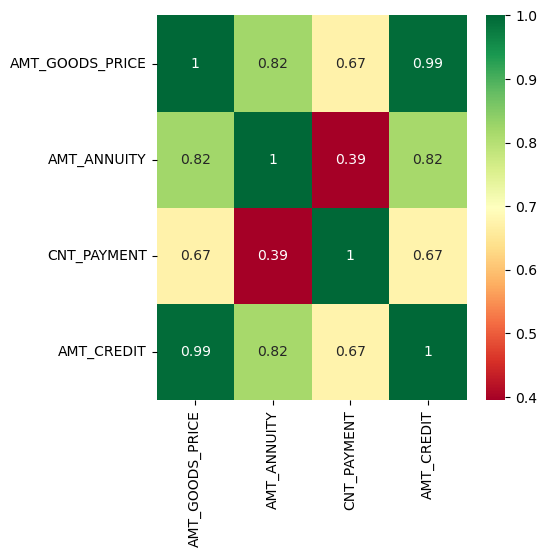

In [592]:
df1_corr=df1[["AMT_GOODS_PRICE","AMT_ANNUITY","CNT_PAYMENT","AMT_CREDIT"]]
fig = plt.figure(figsize=(5,5))
sns.heatmap(df1_corr.corr(),cmap="RdYlGn",annot = True)

In [ ]:
## Looks like there is a positive correlation between AMT_GOODS_PRICE and AMT_CREDIT

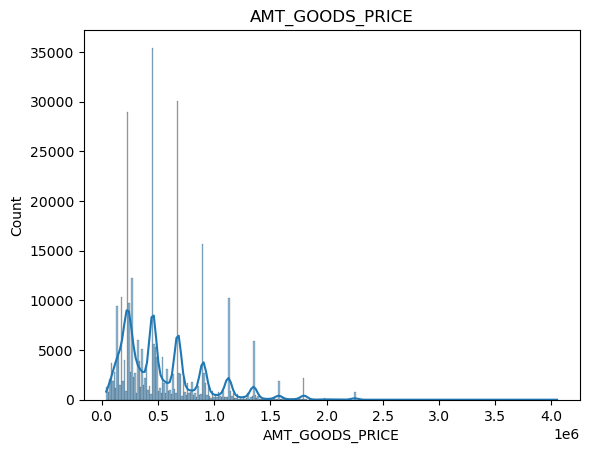

In [603]:
sns.histplot(df, x=df['AMT_GOODS_PRICE'], kde=True)
plt.title('AMT_GOODS_PRICE')
plt.show()

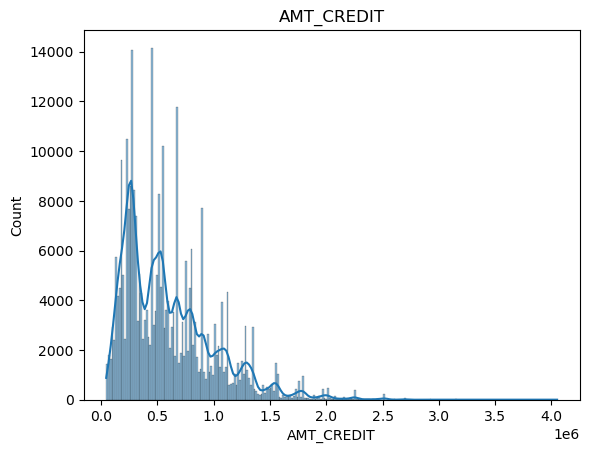

In [604]:
sns.histplot(df, x=df['AMT_CREDIT'], kde=True)
plt.title('AMT_CREDIT')
plt.show()

In [594]:
print(df1["AMT_GOODS_PRICE"].median()) #Goods price of good that client asked for (if applicable) on the previous application
print(df1["AMT_ANNUITY"].median()) #Annuity of previous application
print(df1["CNT_PAYMENT"].median()) #Term of previous credit at application of the previous application
print(df1["AMT_CREDIT"].median()) #Final credit amount on the previous application

112320.0
11250.0
12.0
80541.0


In [630]:
##As we see it is left skewwes, Hence we can fill the Missing Values with Median
df1['AMT_GOODS_PRICE'] = df1['AMT_GOODS_PRICE'].fillna(df1['AMT_GOODS_PRICE'].median())
df1['AMT_ANNUITY'] = df1['AMT_ANNUITY'].fillna(df1['AMT_ANNUITY'].median())
df1['CNT_PAYMENT'] = df1['CNT_PAYMENT'].fillna(df1['CNT_PAYMENT'].median())
df1['AMT_CREDIT'] = df1['AMT_CREDIT'].fillna(df1['AMT_CREDIT'].median())

In [631]:
null_col1= df1.isnull().sum().sort_values(ascending=False)/len(df1)*100
(null_col1[null_col1>0])

PRODUCT_COMBINATION    0.020716
dtype: float64

<Axes: >

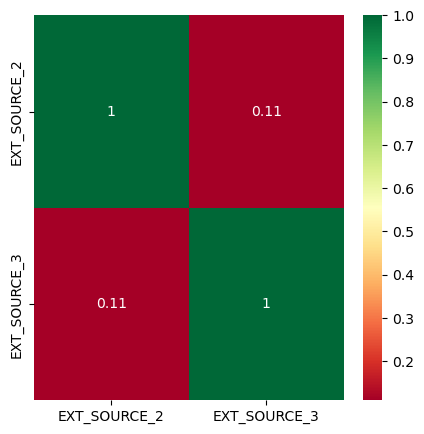

In [560]:
df_corr=df[["EXT_SOURCE_2","EXT_SOURCE_3"]]
fig = plt.figure(figsize=(5,5))
sns.heatmap(df_corr.corr(),cmap="RdYlGn",annot = True)

#### Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these  columns. EXT_SOURCE_3 and EXT_SOURCE_2 dnt find any meaningfull insigts and also has close to 20% null values.

In [251]:
EXT_Source_Null=["EXT_SOURCE_2","EXT_SOURCE_3"]
EXT_Source_Null

['EXT_SOURCE_2', 'EXT_SOURCE_3']

In [252]:
df.drop(columns=EXT_Source_Null,axis=1,inplace=True)

In [253]:
null_col= df.isnull().sum().sort_values(ascending=False)/len(df)*100
null_col[null_col>0]

OCCUPATION_TYPE           31.345545
NAME_TYPE_SUITE            0.420148
AMT_GOODS_PRICE            0.090403
AMT_ANNUITY                0.003902
CNT_FAM_MEMBERS            0.000650
DAYS_LAST_PHONE_CHANGE     0.000325
dtype: float64

In [ ]:
# OCCUPATION_TYPE has 31% of missing value and it a huge number. 

In [256]:
df.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [258]:
df.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [255]:
df.OCCUPATION_TYPE.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: OCCUPATION_TYPE
Non-Null Count   Dtype 
--------------   ----- 
211120 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [257]:
df.OCCUPATION_TYPE.isnull().sum()/df.OCCUPATION_TYPE.shape[0]*100

31.345545362604916

##### 'OCCUPATION_TYPE' which has higher null percentage(31.34%) , So we can add new category as Unknown to analyse further

In [259]:
df['OCCUPATION_TYPE'].fillna('Unknown', inplace =True)

In [260]:
df.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [261]:
df.OCCUPATION_TYPE.isnull().sum()/df.OCCUPATION_TYPE.shape[0]*100

0.0

In [262]:
null_col= df.isnull().sum().sort_values(ascending=False)/len(df)*100
null_col[null_col>0]

NAME_TYPE_SUITE           0.420148
AMT_GOODS_PRICE           0.090403
AMT_ANNUITY               0.003902
CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64

In [263]:
#NAME_TYPE_SUITE
df.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [264]:
df.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [267]:
df.NAME_TYPE_SUITE.mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

#### 'NAME_TYPE_SUITE' which has lower null percentage(0.42%), we can replace with the most frequent value using mode

In [286]:
df.NAME_TYPE_SUITE.fillna(df1.NAME_TYPE_SUITE.mode()[0],inplace = True)

In [287]:
null_col= df.isnull().sum().sort_values(ascending=False)/len(df)*100
null_col[null_col>0]

AMT_GOODS_PRICE           0.090403
CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64

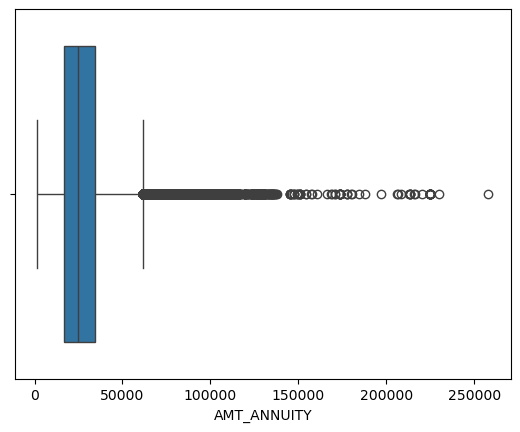

In [270]:
## Ploting boxplot on AMT_ANNUITY for outlier analysis
sns.boxplot(x=df["AMT_ANNUITY"])
plt.show()

In [280]:
#Describe to check the summary
(df['AMT_ANNUITY']/100000).describe()

count    307499.000000
mean          0.271086
std           0.144937
min           0.016155
25%           0.165240
50%           0.249030
75%           0.345960
max           2.580255
Name: AMT_ANNUITY, dtype: float64

#### Here we see that there is not a huge difference between 75% and 25%

In [513]:
(df['AMT_ANNUITY']/100000).skew()

1.579777363861251

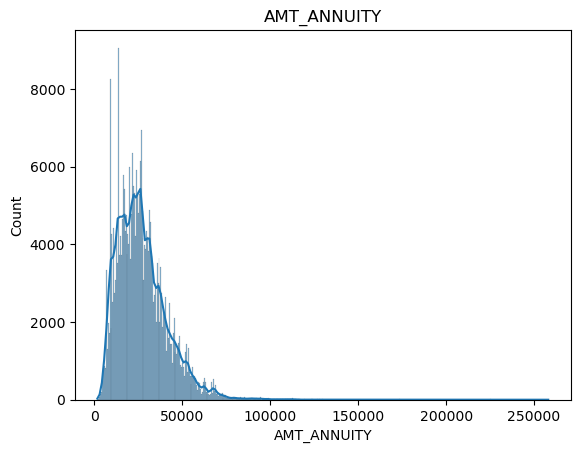

In [294]:
sns.histplot(df, x=df['AMT_ANNUITY'], kde=True)
plt.title('AMT_ANNUITY')
plt.show()

#### We see that it is left skewed,so we can impute with median.

In [282]:
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median(),inplace = True)

In [288]:
null_col= df.isnull().sum().sort_values(ascending=False)/len(df)*100
null_col[null_col>0]

AMT_GOODS_PRICE           0.090403
CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64

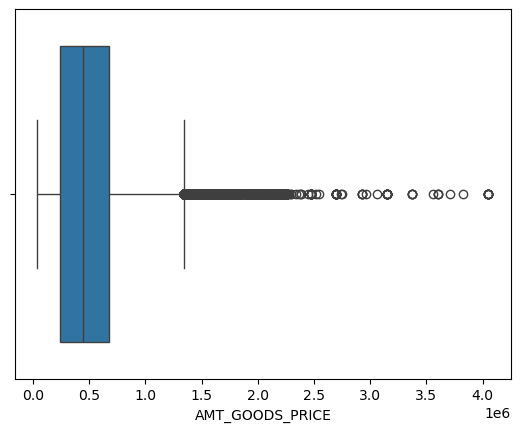

In [289]:
## Ploting boxplot on AMT_GOODS_PRICE for outlier analysis
sns.boxplot(x=df['AMT_GOODS_PRICE'])
plt.show()

In [291]:
#Describe to check the summary
(df['AMT_GOODS_PRICE']/100000).describe()

count    307233.000000
mean          5.383962
std           3.694465
min           0.405000
25%           2.385000
50%           4.500000
75%           6.795000
max          40.500000
Name: AMT_GOODS_PRICE, dtype: float64

In [295]:
(df['AMT_GOODS_PRICE']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99,1])

0.50     4.500
0.70     6.750
0.90    10.935
0.95    13.050
0.99    18.000
1.00    40.500
Name: AMT_GOODS_PRICE, dtype: float64

In [296]:
(df['AMT_GOODS_PRICE']/100000).mean()

5.3839620742888945

In [298]:
(df['AMT_GOODS_PRICE']/100000).median()

4.5

In [516]:
(df['AMT_GOODS_PRICE']/100000).skew()

1.3490003414747451

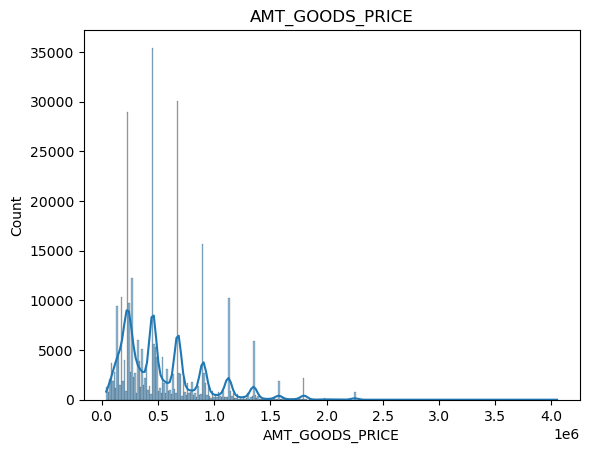

In [290]:
sns.histplot(df, x=df['AMT_GOODS_PRICE'], kde=True)
plt.title('AMT_GOODS_PRICE')
plt.show()

##### Mean and Median are not very different. Also, form the quantiles, the 0.99 and the maximum values are not very far apart. So, we can impute with median.

In [299]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(),inplace = True)

In [300]:
null_col= df.isnull().sum().sort_values(ascending=False)/len(df)*100
null_col[null_col>0]

CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64

In [301]:
#CNT_FAM_MEMBERS
df.CNT_FAM_MEMBERS.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., nan, 14.,
       12., 20., 15., 16., 11.])

In [306]:
df.CNT_FAM_MEMBERS.mode()

0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [302]:
df.CNT_FAM_MEMBERS.value_counts()

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

In [318]:
df.CNT_FAM_MEMBERS.fillna(df.CNT_FAM_MEMBERS.mode()[0], inplace = True)

In [310]:
#DAYS_LAST_PHONE_CHANGE
df.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [311]:
#days cannot be in negative
df.DAYS_LAST_PHONE_CHANGE = df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

In [312]:
df.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [313]:
df.DAYS_LAST_PHONE_CHANGE.fillna(df.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True)

In [319]:
null_col= df.isnull().sum().sort_values(ascending=False)/len(df)*100
null_col[null_col>0]

Series([], dtype: float64)

In [320]:
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

### 3-Analysing Columns

In [325]:
#Combining all the flag into one as it is related to documents and drop them as documents might not add much to defaulter analysis.
flag_documents = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
                    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
                    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


flag_documents

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [326]:
# dropping the column
df.drop(columns=flag_documents,axis=1,inplace=True)

In [327]:
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

#### Binning

In [210]:
df['AMT_INCOME_TOTAL'].quantile([0.5, 0.7, 0.9, 0.95 , 0.99,1])

0.50       147150.0
0.70       180000.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [332]:
df['AMT_INCOME_TOTAL'].min()

25650.0

In [331]:
df['AMT_INCOME_TOTAL'].max()

117000000.0

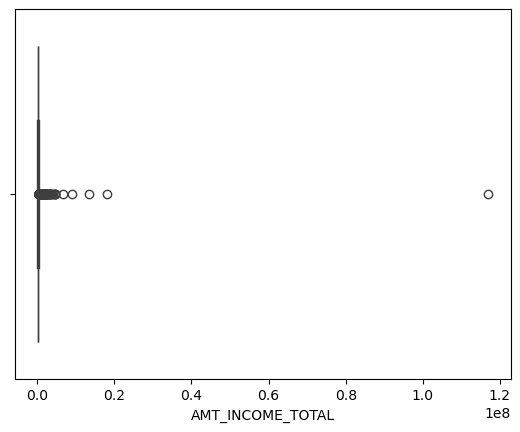

In [342]:
## Ploting boxplot on AMT_INCOME_TOTAL for outlier analysis
sns.boxplot(x=df['AMT_INCOME_TOTAL'])
plt.show()

In [ ]:
#### We see that there is a huge outlier

<function matplotlib.pyplot.show(close=None, block=None)>

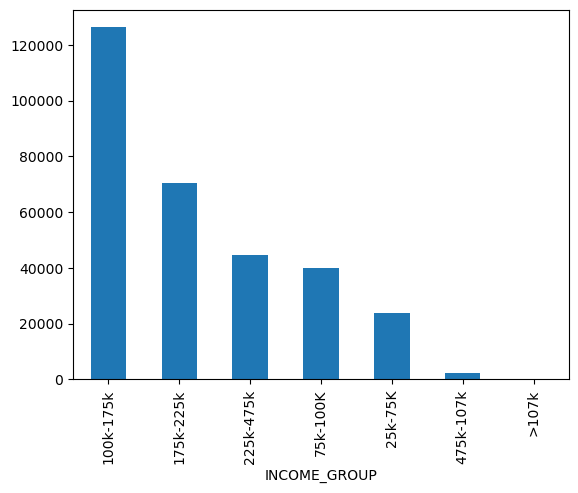

In [469]:
# Creating bins for Income

bins = [25650, 75500,100000, 175200, 225050, 524150, 1072500, 117000000]
slots = ['25k-75K','75k-100K','100k-175k','175k-225k','225k-475k','475k-107k','>107k']

df['INCOME_GROUP']=pd.cut(df['AMT_INCOME_TOTAL'],bins=bins,labels=slots)
df['INCOME_GROUP'].value_counts().plot.bar()
plt.show

In [470]:
df['INCOME_GROUP'].value_counts()

INCOME_GROUP
100k-175k    126262
175k-225k     70433
225k-475k     44472
75k-100K      39779
25k-75K       23917
475k-107k      2408
>107k           238
Name: count, dtype: int64

In [101]:
df.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

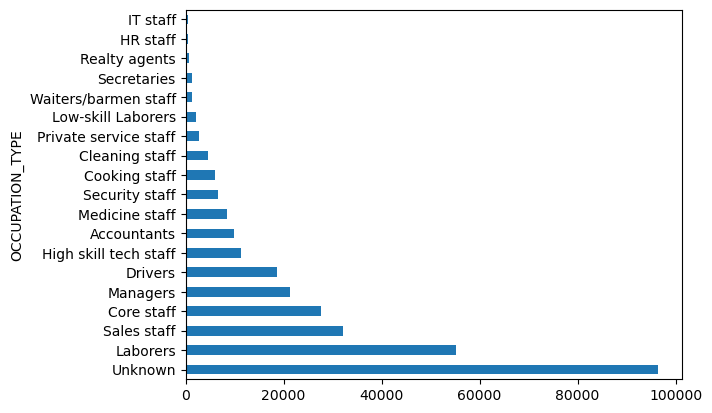

In [346]:
df.OCCUPATION_TYPE.value_counts().plot.barh()
plt.show()

In [348]:
df.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [ ]:
#Gender column contain ‘XNA’ values which could be null.

In [ ]:
#We can impute 'XNA' with 'F' as that is the max 

In [434]:
df.CODE_GENDER.value_counts()
df.loc[df.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F' 
df.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [435]:
df.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [436]:
df.CODE_GENDER.value_counts()/df.TARGET.shape[0]*100

CODE_GENDER
F    65.835694
M    34.164306
Name: count, dtype: float64

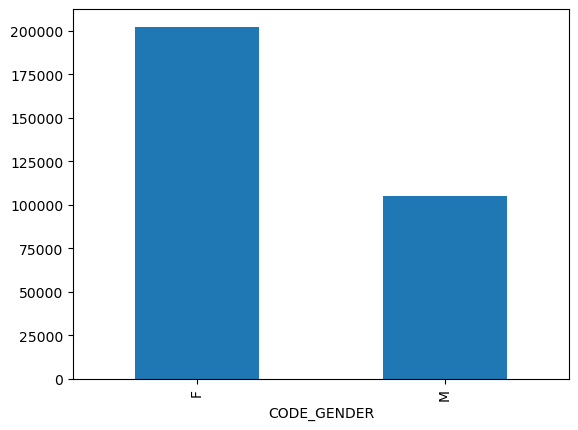

In [437]:
df.groupby('CODE_GENDER')['TARGET'].count().sort_values(ascending=False).plot.bar()
plt.show()

In [486]:
df.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [487]:
df.DAYS_EMPLOYED = df.DAYS_EMPLOYED.apply(lambda x: abs(x//365))

In [488]:
df.DAYS_EMPLOYED.describe()

count    307511.000000
mean        185.839472
std         381.588910
min           0.000000
25%           3.000000
50%           7.000000
75%          16.000000
max        1000.000000
Name: DAYS_EMPLOYED, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

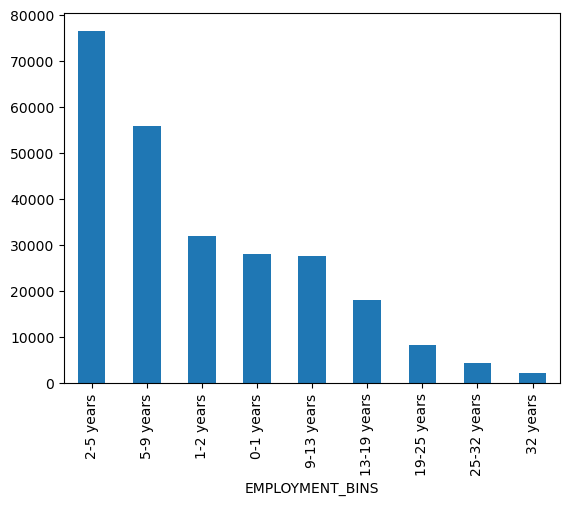

In [489]:
bins = [0,1, 2, 5, 9, 13, 19, 25, 32, 50]
slots = ['0-1 years','1-2 years', '2-5 years', '5-9 years', '9-13 years', '13-19 years', '19-25 years', '25-32 years', '32 years']

df['EMPLOYMENT_BINS']=pd.cut(df['DAYS_EMPLOYED'],bins=bins,labels=slots)
df['EMPLOYMENT_BINS'].value_counts().plot.bar()
plt.show

In [484]:
df.EMPLOYMENT_BINS.value_counts()


EMPLOYMENT_BINS
0-1 years      0
1-2 years      0
2-5 years      0
5-9 years      0
9-13 years     0
13-19 years    0
19-25 years    0
25-32 years    0
32 years       0
Name: count, dtype: int64

In [18]:
df.AMT_ANNUITY.head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [ ]:
pip install seaborn --upgrade

#### DAYS_BIRTH : Client's age in days at the time of application

In [33]:
df.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

#### Here we see that age is 
 1)Negative which is not correct as age cannot be a negative value
 2)Age is in days, so need to be converted in years

In [549]:
df.DAYS_BIRTH = df.DAYS_BIRTH.apply(lambda x: abs(x//365))


In [550]:
#Remnae DAYS_BIRTH as Age_In_Years
df.rename({'DAYS_BIRTH':'AGE_IN_YEARS'}, axis =1, inplace = True)

In [551]:
df.AGE_IN_YEARS.describe()

count    307511.000000
mean         44.433090
std          11.954493
min          21.000000
25%          35.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: AGE_IN_YEARS, dtype: float64

In [552]:
# Creating bins for Age

bins = [0,20,30,40,50,60,100]
slots = ['0-20','20-30','30-40','40-50','50-60','>60']

df['AGE_GROUP']=pd.cut(df['AGE_IN_YEARS'],bins=bins,labels=slots)


<function matplotlib.pyplot.show(close=None, block=None)>

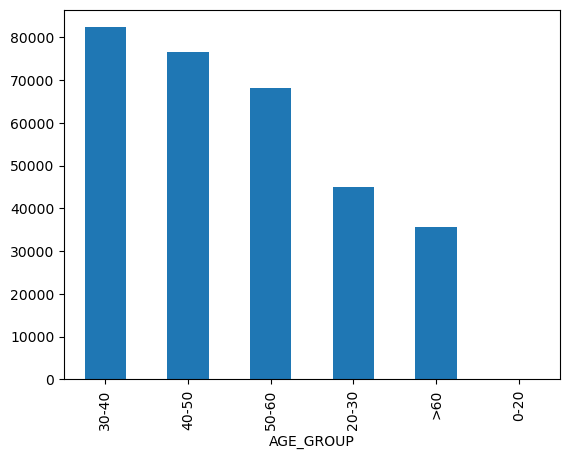

In [553]:
df['AGE_GROUP'].value_counts().plot.bar()
plt.show

In [407]:
#Column decription:Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
df.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [410]:
#Rename the values in meaningful name
df["TARGET"] = df["TARGET"].replace({1:"Defaulter",0:"Repayer"})


In [424]:
df.TARGET.value_counts()

TARGET
Repayer      282686
Defaulter     24825
Name: count, dtype: int64

#### 

In [425]:
df['TARGET'].count()

307511

In [633]:
Repayer = df.loc[df["TARGET"]=='Repayer'] 
Defaulter = df.loc[df["TARGET"]=='Defaulter']

In [427]:
round(len(Defaulter)/len(Repayer),2)

0.09

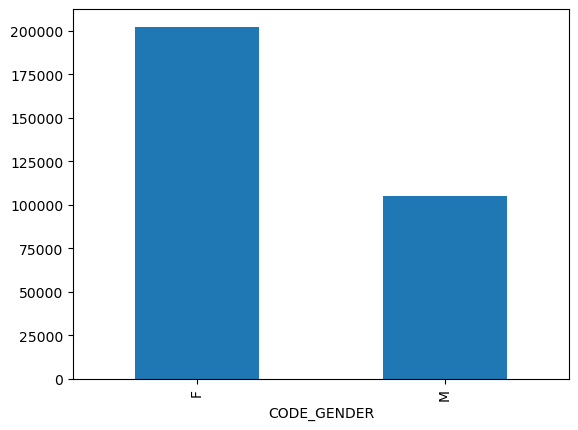

In [440]:
df.groupby('CODE_GENDER')['TARGET'].count().sort_values(ascending=False).plot.bar()
plt.show()

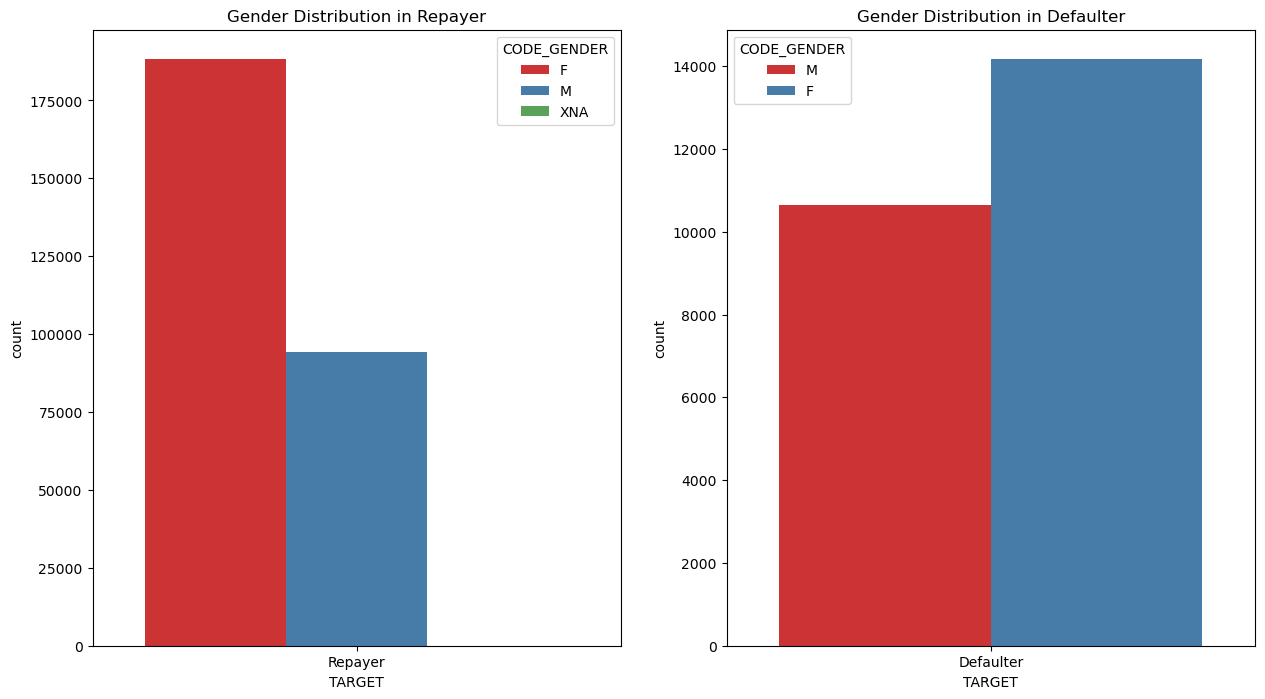

In [442]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Repayer, palette = 'Set1')
plt.title("Gender Distribution in Repayer")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Defaulter, palette = 'Set1')
plt.title("Gender Distribution in Defaulter")
plt.show()

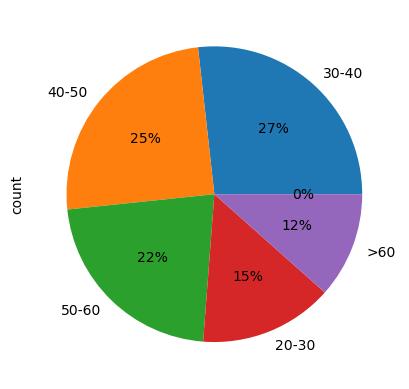

In [554]:
df.AGE_GROUP.value_counts().plot.pie(autopct = "%1.0f%%")
plt.show()

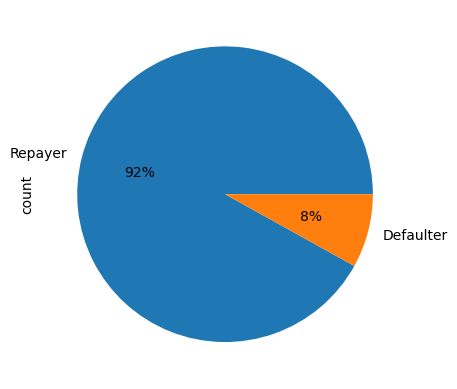

In [540]:
df.TARGET.value_counts().plot.pie(autopct = "%1.0f%%")
plt.show()


#### Insights  
As per the dataset looks like defaulter percentage is very less than repayer

df.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct = "%1.0f%%")
plt.show()

In [474]:
df.select_dtypes(include=['object']).columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [477]:
columns_analysis= ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR']
columns_analysis

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR']

In [32]:
df.NAME_INCOME_TYPE.value_counts(normalize=True)*100

NAME_INCOME_TYPE
Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: proportion, dtype: float64

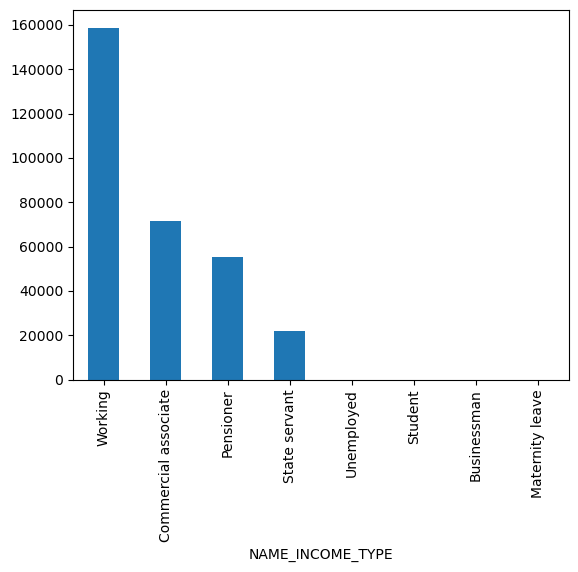

In [448]:
df.groupby('NAME_INCOME_TYPE')['CODE_GENDER'].count().sort_values(ascending=False).plot.bar()
plt.show()

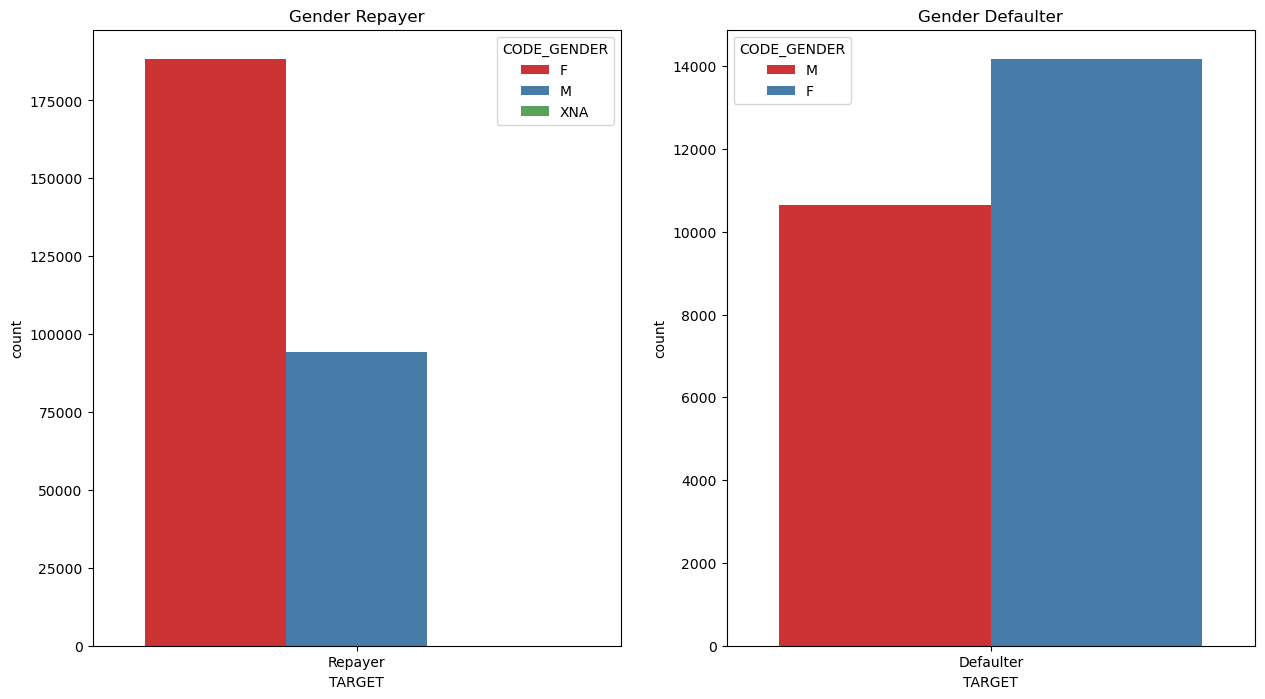

In [517]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Repayer, palette = 'Set1')
plt.title("Gender Repayer")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Defaulter, palette = 'Set1')
plt.title("Gender Defaulter")
plt.show()

#### Insights
It seems Female are more that male clients who fails to repay the loan 

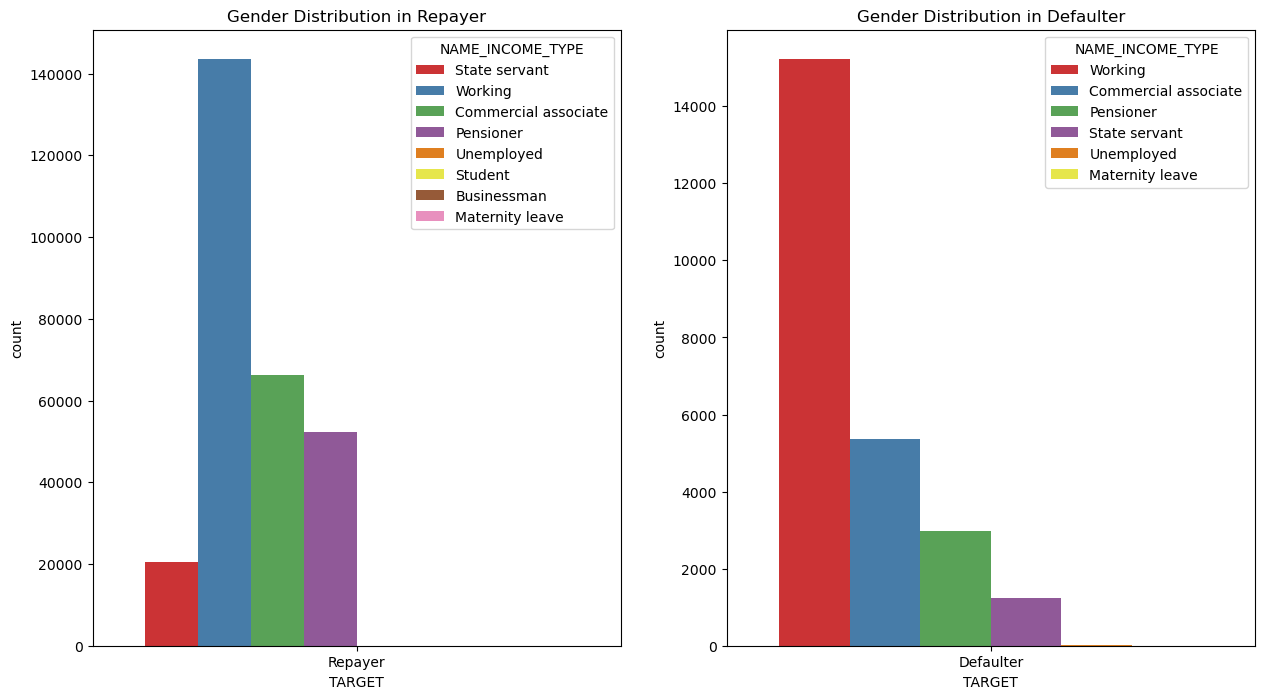

In [449]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='NAME_INCOME_TYPE',data=Repayer, palette = 'Set1')
plt.title("Income Type Distribution in Repayer")
plt.subplot(122)
sns.countplot(x='TARGET',hue='NAME_INCOME_TYPE',data=Defaulter, palette = 'Set1')
plt.title("Income Type Distribution in Defaulter")
plt.show()

#### Insights

Clients who applied for loans were getting income by Working,Commercial associate and Pensioner are more likely to repay the loan.
Working category have high risk to default.
State Servant is at Minimal risk to default.

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='DAYS_EMPLOYED',data=Repayer, palette = 'Set1')
plt.title("Work Experienced-Repayer")
plt.subplot(122)
sns.countplot(x='TARGET',hue='DAYS_EMPLOYED',data=Defaulter, palette = 'Set1')
plt.title("Work Experienced-Defaulter")
plt.show()

In [453]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [537]:
def plotting(df, col1, col2=None):
     
    fig = plt.figure(figsize=(13,10))
    
       
    ax1 = plt.subplot(221)
    sns.countplot(x= col1, data = df, ax = ax1)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    
    ax2 = plt.subplot(222)
    sns.countplot(x= col2, hue = 'TARGET', data = df, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    

    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

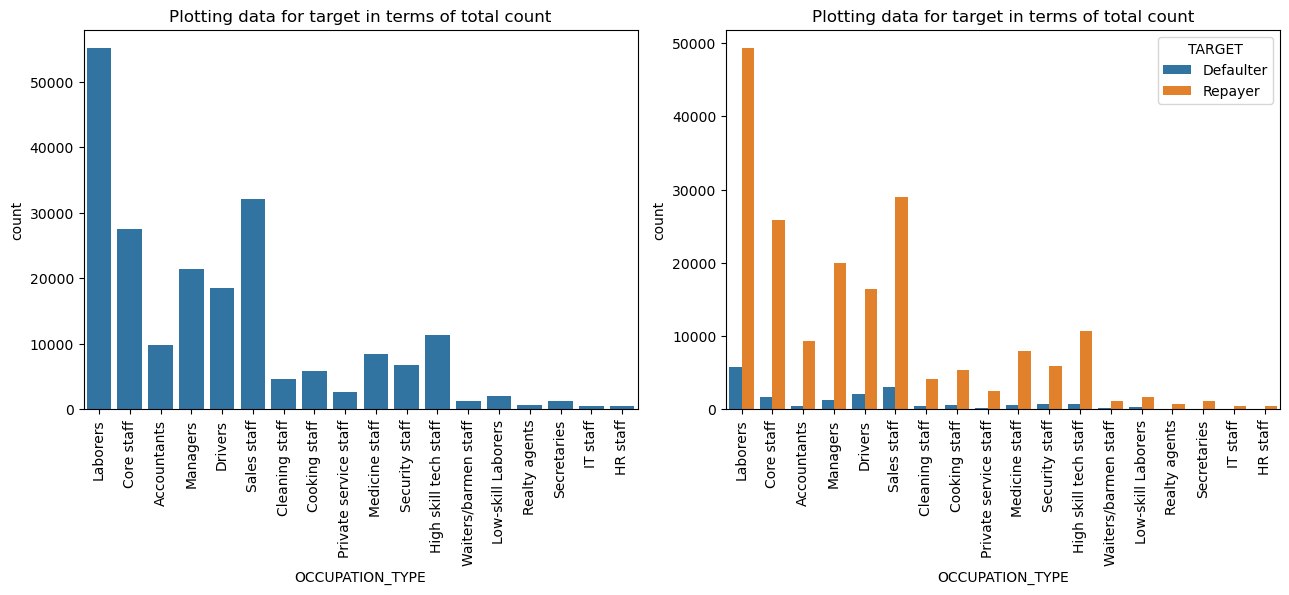

In [539]:
plotting(df, 'OCCUPATION_TYPE','OCCUPATION_TYPE')

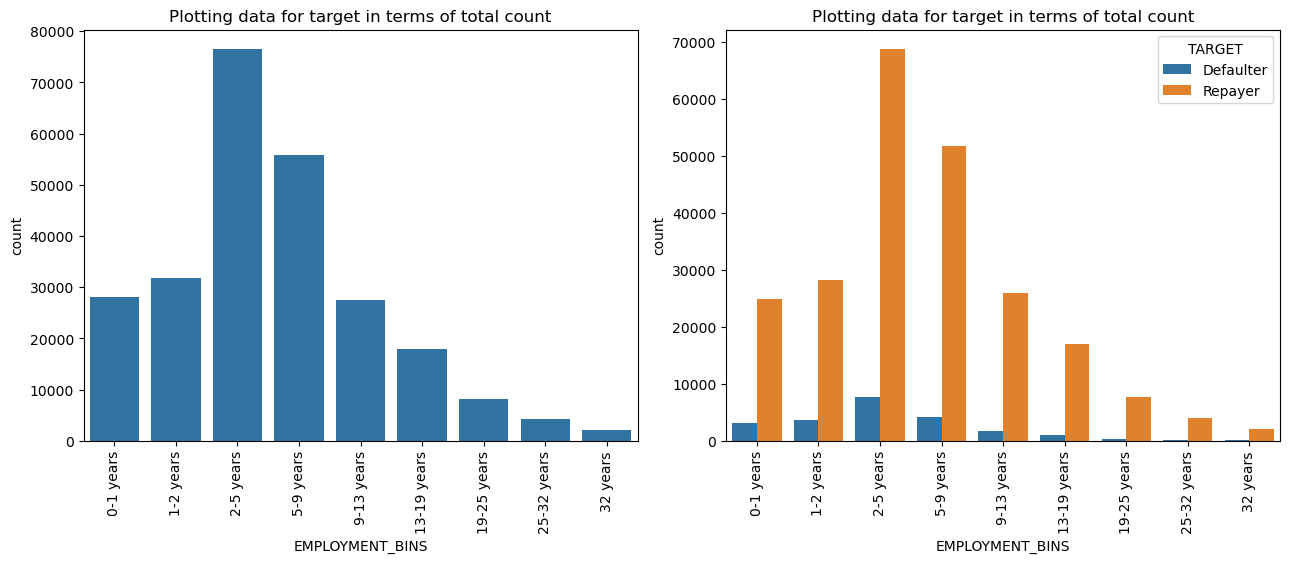

In [538]:
plotting(df, 'EMPLOYMENT_BINS','EMPLOYMENT_BINS')

#### Insights
We infer from above chart that emplyee with 2-5 years tends to fail to repay the loan.

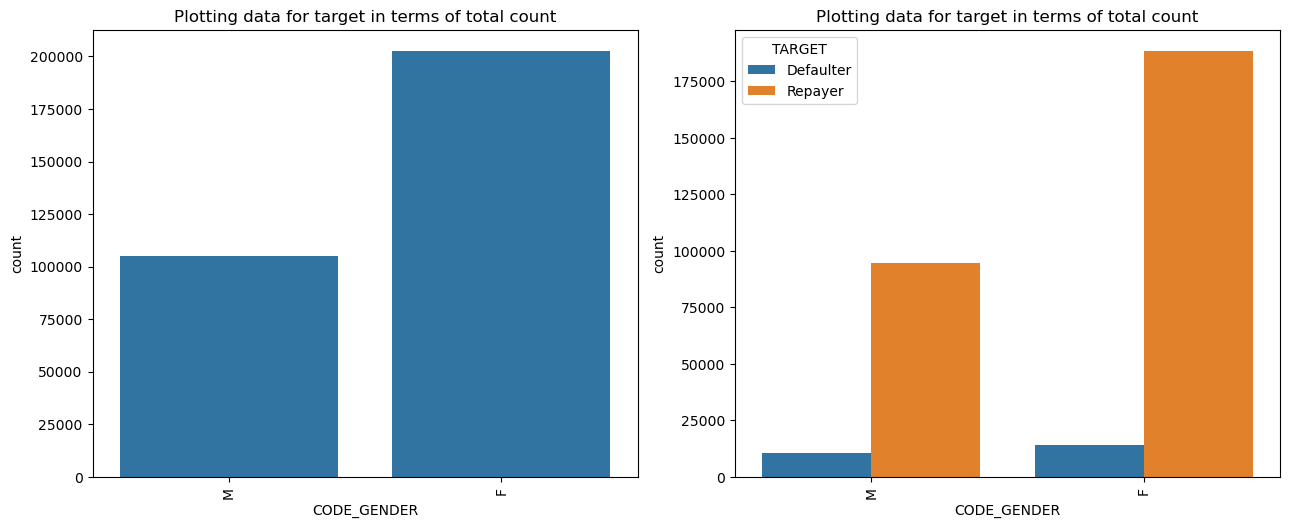

In [542]:
plotting(df, 'CODE_GENDER','CODE_GENDER')

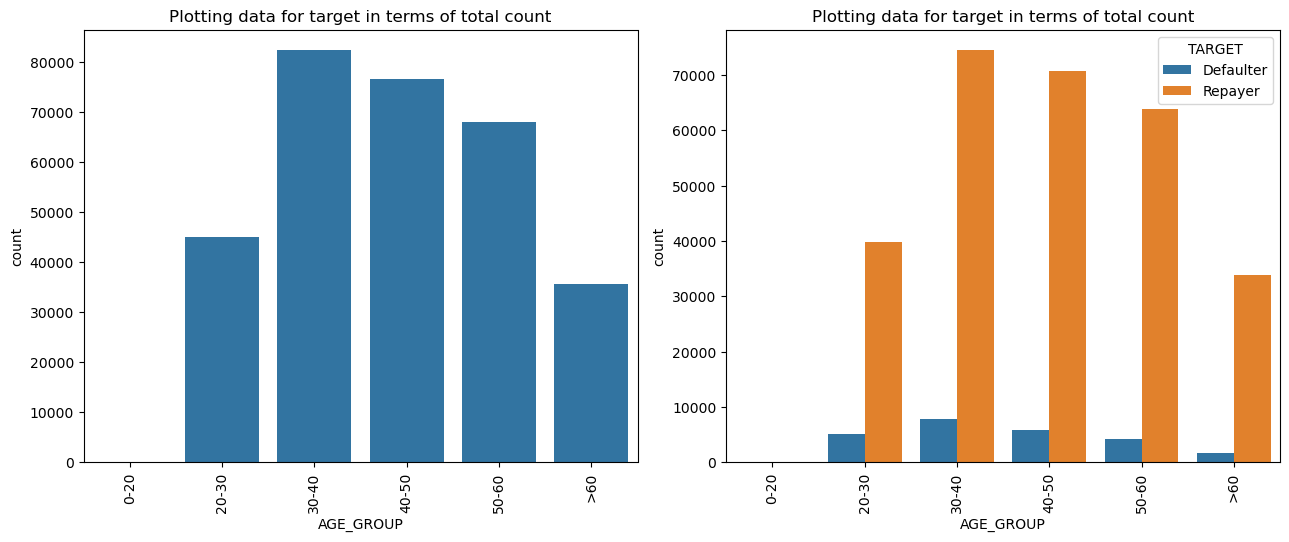

In [555]:
plotting(df, 'AGE_GROUP','AGE_GROUP')

#### Insights
We infer from above bar chart  that Age Group between 34-40 years are more likely to be defaulters.

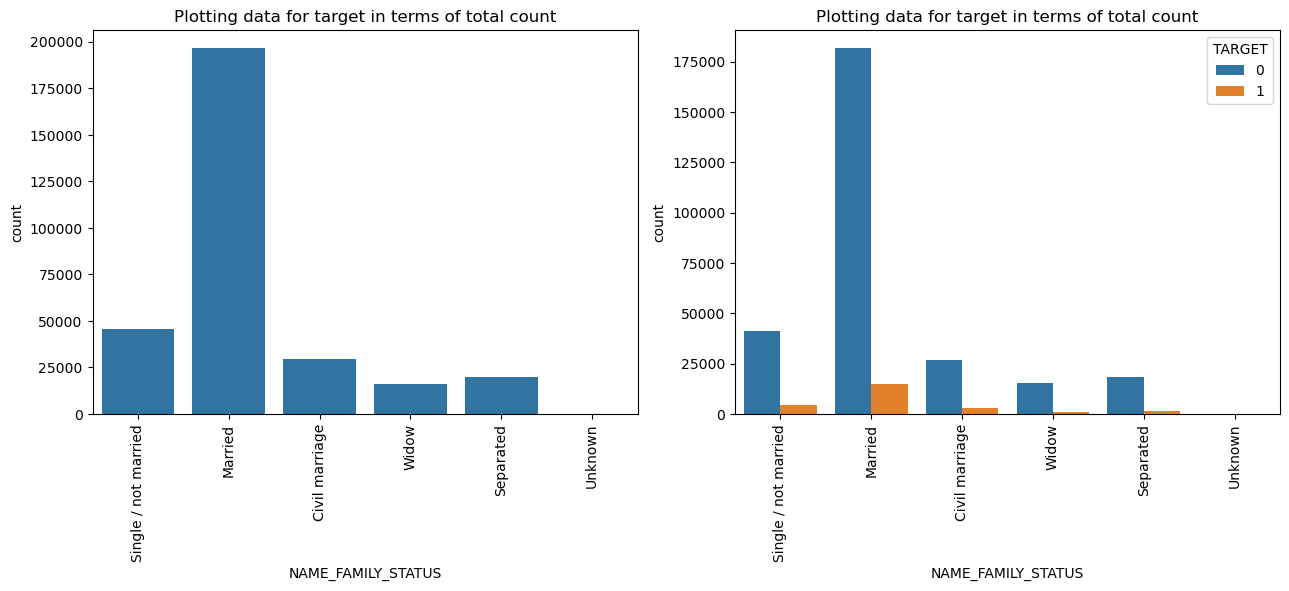

In [635]:
plotting(df, 'NAME_FAMILY_STATUS','NAME_FAMILY_STATUS')

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_CREDIT'>

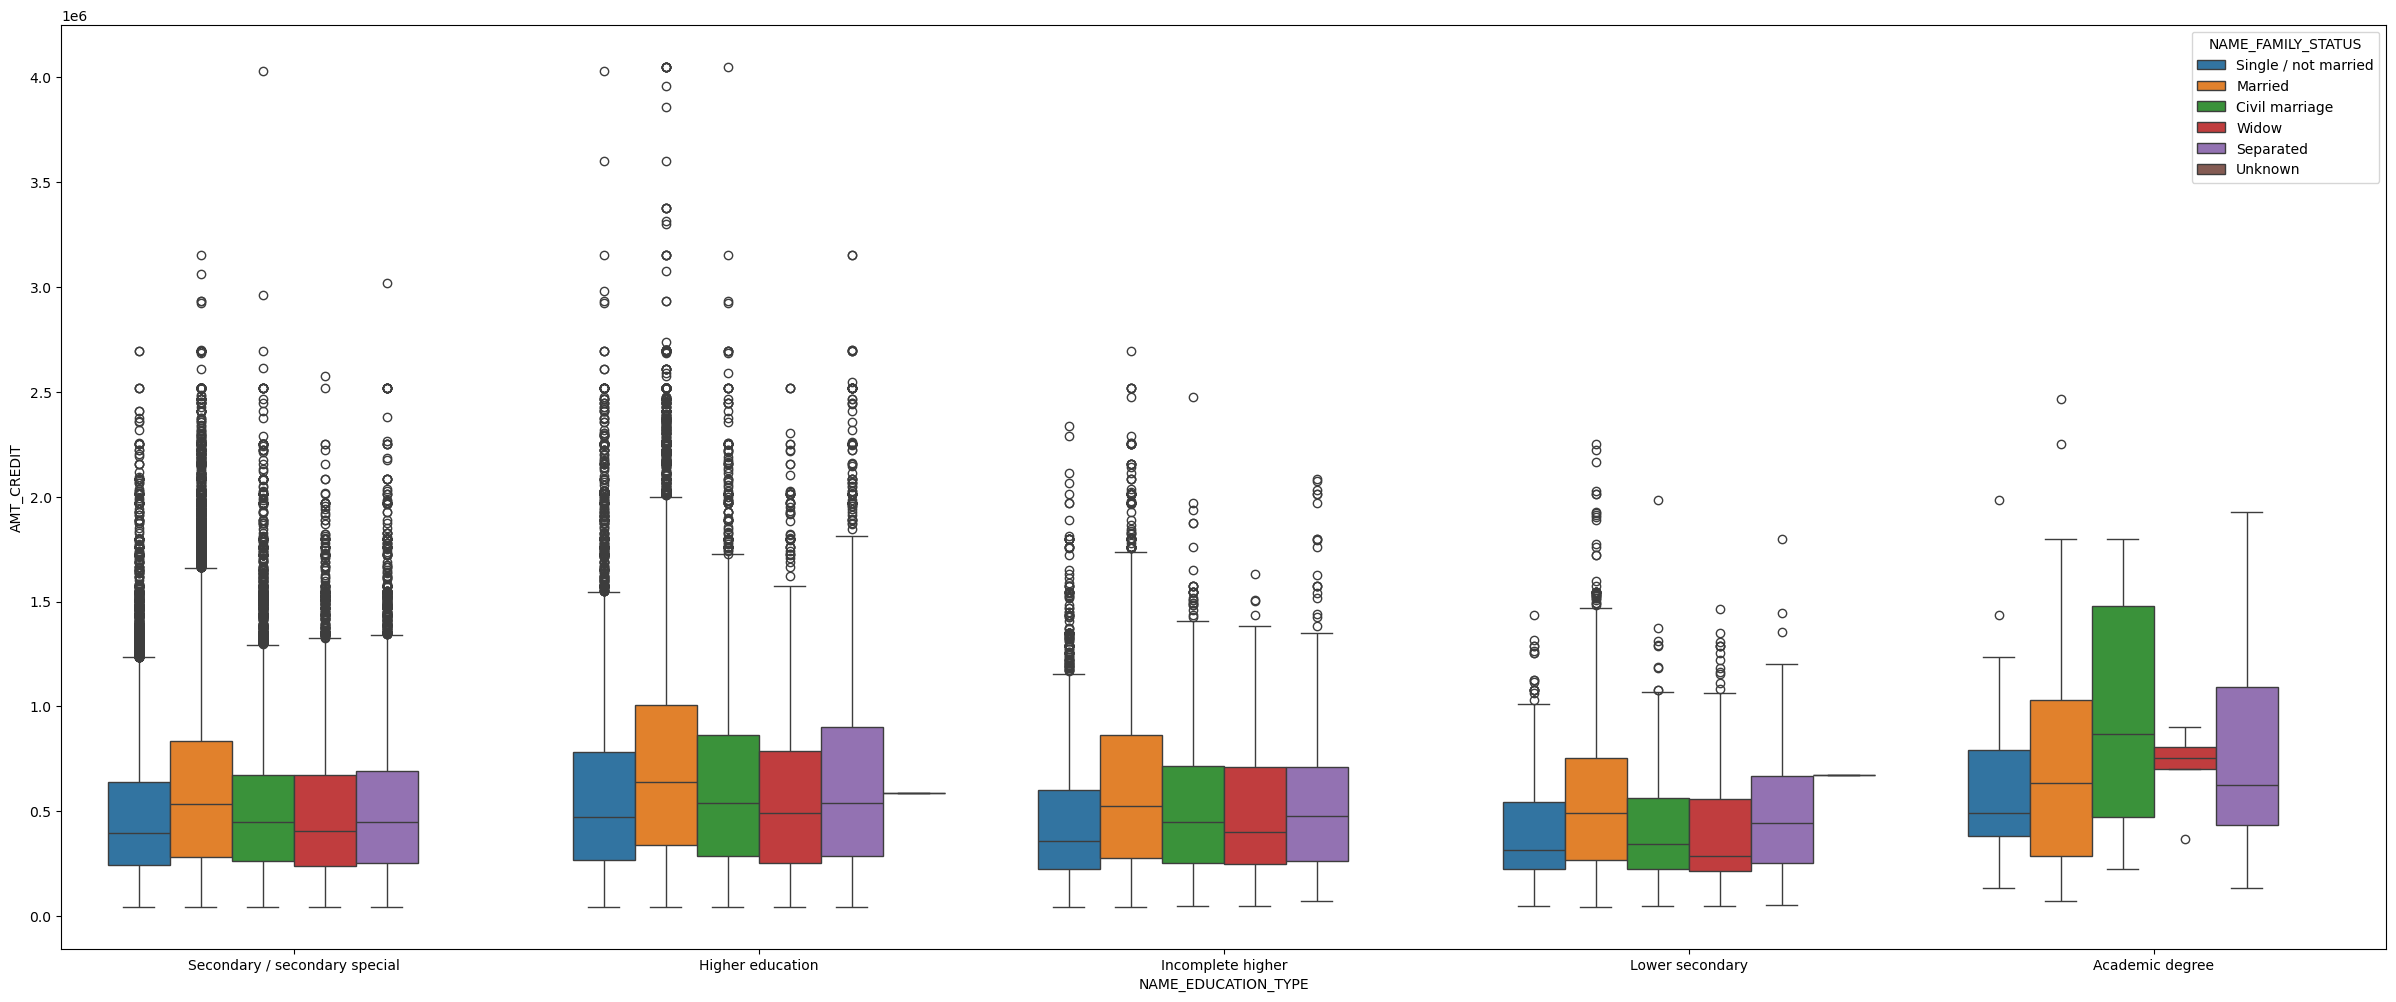

In [566]:
plt.figure(figsize=(30,12))
sns.boxplot(data =df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue ='NAME_FAMILY_STATUS',orient='v')

#### Insights 
We infer from above boxplot that 
Married client with Academic Degree applied for a higher credit amount. And doesn’t have outliers.As well as Single clients with academic degrees have a slim boxplot with no outliers.
Some of the clients with Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special Education are more likely to take a high amount of credit amount as there is a huge outliers.